In [94]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import numpy as np
import json
import matplotlib.pyplot as plt

In [95]:
run_folder = Path("../runs").resolve()
runs = {id: run for id, run in enumerate(run_folder.iterdir()) if run.is_dir()}
print(runs)

{0: WindowsPath('D:/00Repos/GPT-Swarm/runs/non-interacting-swarm-benchmark_2023-04-16_09-40-27'), 1: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_13-09-52'), 2: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_13-11-59'), 3: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_13-33-27'), 4: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_13-42-41'), 5: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_13-53-29'), 6: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_14-07-48'), 7: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_15-02-53'), 8: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_15-27-35'), 9: WindowsPath('D:/00Repos/GPT-Swarm/runs/run_strong_password_checker_2023-04-16_16-00-23'), 10: WindowsPath('D:/00Repos/GPT-Swarm/runs/sharinginsights_no_sol

In [96]:
def get_latest_run(runs):
    # take the last run
    run_strs = [str(run) for run in runs.values()]
    run_dates = ["_".join(run_str.split("_")[-2:]) for run_str in run_strs]
    run_dates = [datetime.strptime(date, "%Y-%m-%d_%H-%M-%S") for date in run_dates]
    run_id = np.argmax(run_dates)
    run = runs[run_id]
    return run_id, run


def load_run(runs, run_id=None):
    """Logs format:
    {"time": "2023-04-15 12:20:27,477", "level": "INFO", "agent_id": -1, "cycle": -1, "step": "swarm", "message": "Created 2 agents with roles: ['python developer' 'python developer']"}
    {"time": "2023-04-15 12:20:27,477", "level": "INFO", "agent_id": -1, "cycle": -1, "step": "swarm", "message": "Agents roles:\n[['p' 'p']]"} 
    """
    if run_id is None:
        run_id, run = get_latest_run(runs)
    else:
        run = runs[run_id]
    print(f"Loading run {run_id}: {run}")

    log_file = run / "swarm.json"

    # parse in pandas
    df = pd.read_json(log_file, lines=True)
    df["time"] = pd.to_datetime(df["time"])
    df["agent_id"] = df["agent_id"].astype(int)
    df["cycle"] = df["cycle"].astype(int)
    df["step"] = df["step"].astype(str)
    df["message"] = df["message"].astype(str)
    df["level"] = df["level"].astype(str)

    # unique agents
    agents = df["agent_id"].unique()
    print(f"Found {len(agents)} agents: {agents}")

    # unique cycles
    cycles = df["cycle"].unique()
    print(f"Found {len(cycles)} cycles: {cycles}")

    # unique steps
    steps = df["step"].unique()
    print(f"Found {len(steps)} steps: {steps}")
    return df

def load_run_performance(runs, run_id=None):
    """Shared memory format:
    {
        "9232593a-7d6b-4a52-886b-2fa91b61d788": {
            "agent": 0,
            "epoch": 1681554083.161995,
            "score": 0.5981963927855711,
            "cycle": 0,
            "content": "solution1"
        },
        "40d1c848-f472-400f-9d9e-943b06fb37f0": {
            "agent": 1,
            "epoch": 1681554087.91376,
            "score": 0.16490057103755076,
            "cycle": 1,
            "content": "solution2"
        }
    }
    """
    if run_id is None:
        run_id, run = get_latest_run(runs)
    else:
        run = runs[run_id]

    shared_memory_file = run / "shared_memory.json"
    # read to dataframe with columns: id, agent, epoch, score, cycle, content
    with open(shared_memory_file) as f:
        shared_memory = json.load(f)
    df = pd.DataFrame.from_dict(shared_memory, orient="index")
    df["agent"] = df["agent"].astype(int)
    df["epoch"] = df["epoch"].astype(float)
    df["score"] = df["score"].astype(float)
    df["cycle"] = df["cycle"].astype(int)
    df["content"] = df["content"].astype(str)
    return df

def pretty_display(df, level=None, agent_id=None, cycle=None, step=None, message=None):
    """Pretty display of the logs"""
    if level is not None:
        df = df[df["level"] == level]
    if agent_id is not None:
        df = df[df["agent_id"] == agent_id]
    if cycle is not None:
        df = df[df["cycle"] == cycle]
    if step is not None:
        df = df[df["step"] == step]
    if message is not None:
        df = df[df["message"] == message]

    
    for _, row in df.iterrows():
        print("====================================================================================================================================================")
        print("====================================================================================================================================================")
        print("====================================================================================================================================================")
        print("====================================================================================================================================================")
        print(f"{row['time']} {row['level']} {row['agent_id']} {row['cycle']} {row['step']}")
        print(row['message'])
    return df
              

In [102]:
df = load_run(runs)

Loading run 9: D:\00Repos\GPT-Swarm\runs\run_strong_password_checker_2023-04-16_16-00-23


C:\Users\nicel\AppData\Local\Temp\ipykernel_20212\2981346763.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


Found 26 agents: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24]
Found 61 cycles: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59]
Found 8 steps: ['swarm' 'init' 'perform_task' 'summarize_incoming' 'call_model' 'share'
 'truncate_message' 'self_evaluate']


In [103]:
df_perf = load_run_performance(runs)

In [99]:
df_perf.drop(columns=["epoch", "content"], inplace=True)

<Axes: xlabel='cycle'>

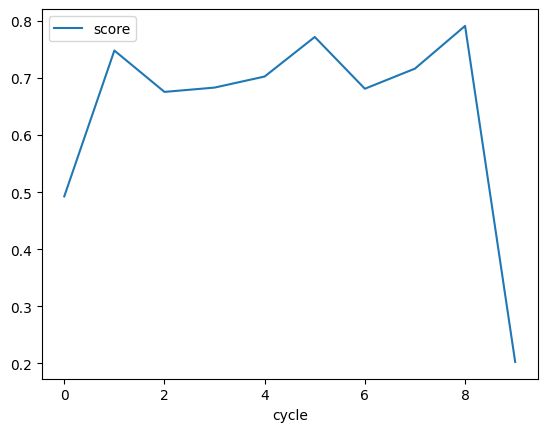

In [100]:
# plot score over cycles
df_perf.groupby("cycle").mean().plot(y="score")

<Axes: xlabel='cycle'>

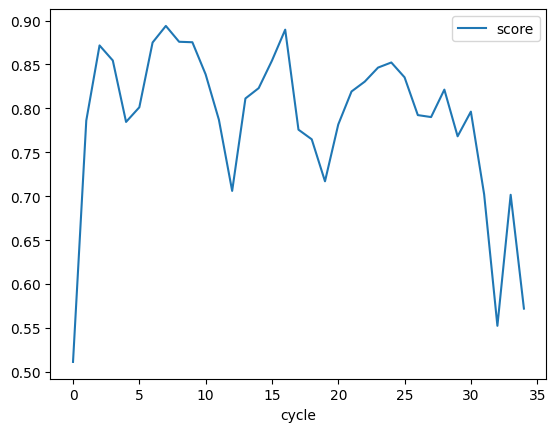

In [85]:
# plot score over cycles
df_perf.groupby("cycle").mean().plot(y="score")

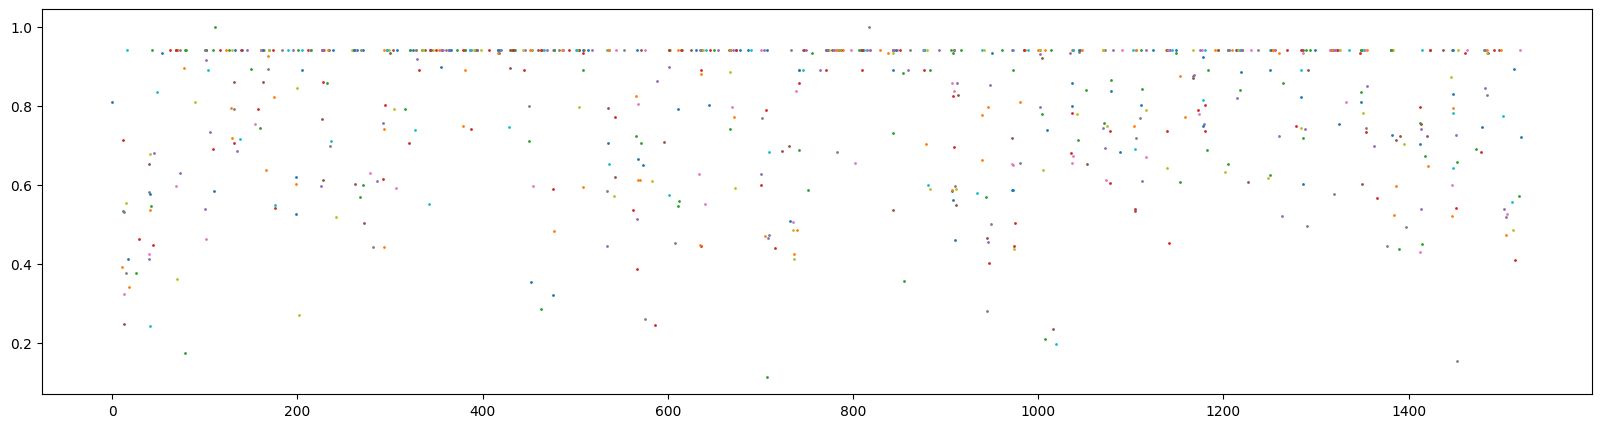

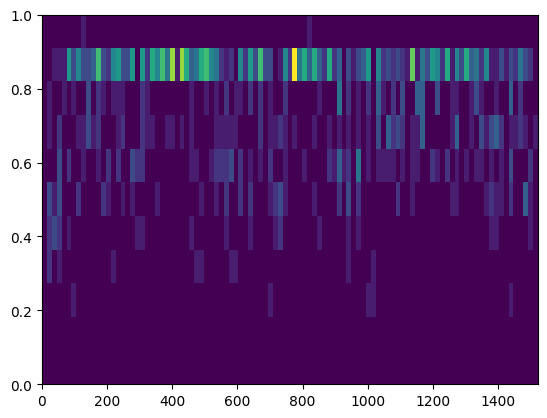

In [82]:
# plot score over epoch for each agent on the same plot
fig = plt.figure(figsize=(20, 5))
epoch_0 = df_perf["epoch"].min()
epoch_max = df_perf["epoch"].max()
for agent in df_perf["agent"].unique():
    df_agent = df_perf[df_perf["agent"] == agent]
    x_i = df_agent["epoch"].values
    y_i = df_agent["score"].values
    plt.plot(df_agent["epoch"]-epoch_0, df_agent["score"], label=f"agent {agent}", marker="o", markersize=1, linewidth=0)
#plt.legend()
plt.show()

# sort by epoch
df_perf = df_perf.sort_values(by="epoch")
x = df_perf["epoch"].values - df_perf["epoch"].min()
y = df_perf["score"].values

# show distribution over time as a heatmap
n_bins_t = 100
n_bins_y = 10
t_bins = np.linspace(x.min(), x.max(), n_bins_t)
y_bins = np.linspace(0, 1, n_bins_y)
t_bins_centers = (t_bins[1:] + t_bins[:-1]) / 2
y_bins_centers = (y_bins[1:] + y_bins[:-1]) / 2
t_binned = np.digitize(x, t_bins)
y_binned = np.digitize(y, y_bins)
heatmap = np.zeros((n_bins_t+1, n_bins_y+1))
for t, y in zip(t_binned, y_binned):
    heatmap[t, y] += 1
plt.imshow(heatmap.T, origin="lower", aspect="auto", extent=[t_bins.min(), t_bins.max(), y_bins.min(), y_bins.max()])
plt.show()



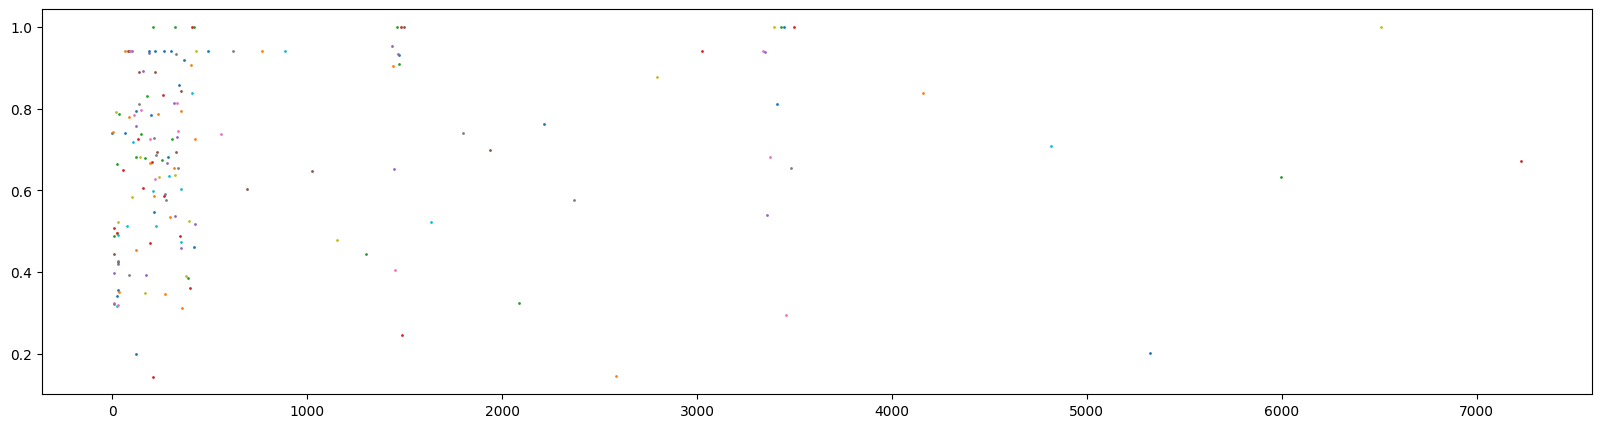

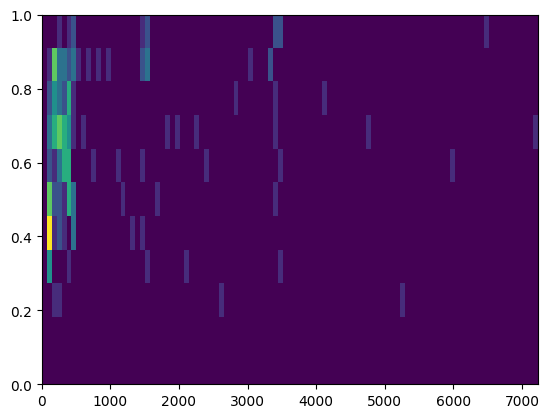

In [104]:
# plot score over epoch for each agent on the same plot
fig = plt.figure(figsize=(20, 5))
epoch_0 = df_perf["epoch"].min()
epoch_max = df_perf["epoch"].max()
for agent in df_perf["agent"].unique():
    df_agent = df_perf[df_perf["agent"] == agent]
    x_i = df_agent["epoch"].values
    y_i = df_agent["score"].values
    plt.plot(df_agent["epoch"]-epoch_0, df_agent["score"], label=f"agent {agent}", marker="o", markersize=1, linewidth=0)
#plt.legend()
plt.show()

# sort by epoch
df_perf = df_perf.sort_values(by="epoch")
x = df_perf["epoch"].values - df_perf["epoch"].min()
y = df_perf["score"].values

# show distribution over time as a heatmap
n_bins_t = 100
n_bins_y = 10
t_bins = np.linspace(x.min(), x.max(), n_bins_t)
y_bins = np.linspace(0, 1, n_bins_y)
t_bins_centers = (t_bins[1:] + t_bins[:-1]) / 2
y_bins_centers = (y_bins[1:] + y_bins[:-1]) / 2
t_binned = np.digitize(x, t_bins)
y_binned = np.digitize(y, y_bins)
heatmap = np.zeros((n_bins_t+1, n_bins_y+1))
for t, y in zip(t_binned, y_binned):
    heatmap[t, y] += 1
plt.imshow(heatmap.T, origin="lower", aspect="auto", extent=[t_bins.min(), t_bins.max(), y_bins.min(), y_bins.max()])
plt.show()



In [55]:
df_i = pretty_display(df, agent_id=1, cycle=2, step="call_model")

2023-04-16 10:42:01.300000 DEBUG 1 2 call_model
Condencing the incoming messages. 

 *Content*: Best potential solution so far:
*Score:*0.917
*Content:*
*Potential solution:*
```python
def strongPasswordChecker(s: str) -> int:
    if not s:
        return 6
    n = len(s)
    lower, upper, digit = False, False, False
    missing_type = 3
    for c in s:
        if c.islower():
            lower = True
        elif c.isupper():
            upper = True
        elif c.isdigit():
            digit = True
    if lower:
        missing_type -= 1
    if upper:
        missing_type -= 1
    if digit:
        missing_type -= 1
    change = 0
    one, two = 0, 0
    i = 2
    while i < n:
        if s[i] == s[i-1] == s[i-2]:
            length = 2
            while i < n and s[i] == s[i-1]:
                length += 1
                i += 1
            change += length // 3
            if length % 3 == 0:
                one += 1
            elif length % 3 == 1:
                two += 1
      